In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

In [ ]:
# Pasta(diretórios) com as imagens e as legendas 
data_dir = "/Users/rafael/Desktop/PestTracker2/data"
image_dir = os.path.join(data_dir, "/Users/rafael/Desktop/PestTracker2/data/images")
label_dir = os.path.join(data_dir, "/Users/rafael/Desktop/PestTracker2/data/labels")

In [ ]:
# Lista todos os formatos das imagens e das legendas correspondentes
all_images = [f for f in os.listdir(os.path.join(image_dir, "train")) if f.endswith('.jpg') or f.endswith('.png')]
all_labels = [f.replace('.jpg', '.txt').replace('.png', '.txt') for f in all_images]

In [ ]:
# Divisão em treinamento (70%), validação (15%) e teste (15%)
train_images, val_test_images, train_labels, val_test_labels = train_test_split(
    all_images, all_labels, test_size=0.3, random_state=42)

val_images, test_images, val_labels, test_labels = train_test_split(
    val_test_images, val_test_labels, test_size=0.5, random_state=42)

In [ ]:
# Função para mover os ficheiros (imagens e legendas) para as pastas apropriadas
def move_files(file_list, src_dir, dest_dir):
    if not os.path.exists(dest_dir):
        os.makedirs(dest_dir)
    for file in file_list:
        src_file_path = os.path.join(src_dir, file)
        dest_file_path = os.path.join(dest_dir, file)
        if os.path.exists(src_file_path):
            shutil.move(src_file_path, dest_file_path)
        else:
            print(f"File not found: {src_file_path}")

In [ ]:
# Criar novas pastas (diretórios)
train_image_dir = os.path.join(image_dir, "train_set")
val_image_dir = os.path.join(image_dir, "val_set")
test_image_dir = os.path.join(image_dir, "test_set")

train_label_dir = os.path.join(label_dir, "train_set")
val_label_dir = os.path.join(label_dir, "val_set")
test_label_dir = os.path.join(label_dir, "test_set")

In [ ]:
# Mover as imagem para as novas pastas  treino, validação e teste
move_files(train_images, os.path.join(image_dir, "train"), train_image_dir)
move_files(val_images, os.path.join(image_dir, "train"), val_image_dir)
move_files(test_images, os.path.join(image_dir, "train"), test_image_dir)

# Mover as legendas para as novas pastas  treino, validação e teste
move_files(train_labels, os.path.join(label_dir, "train"), train_label_dir)
move_files(val_labels, os.path.join(label_dir, "train"), val_label_dir)
move_files(test_labels, os.path.join(label_dir, "train"), test_label_dir)

In [18]:
from ultralytics import YOLO

# criar um modelo do zero com YOLO  
model = YOLO("yolov8n.yaml") 

# treinar o modelo 
results = model.train(data="config.yaml", epochs=30)  


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /Users/rafael/Desktop/ceratitis/data/labels/train_set... 3454 images, 5 backgrounds, 0 corrupt: 100%|██████████| 3454/3454 [00:00<00:00, 4170.58it/s]

train: New cache created: /Users/rafael/Desktop/ceratitis/data/labels/train_set.cache



val: Scanning /Users/rafael/Desktop/ceratitis/data/labels/val_set... 740 images, 5 backgrounds, 0 corrupt: 100%|██████████| 740/740 [00:00<00:00, 4517.70it/s]

val: New cache created: /Users/rafael/Desktop/ceratitis/data/labels/val_set.cache


Plotting labels to /Users/rafael/runs/detect/train14/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30         0G      3.141      3.422      3.742         28        640: 100%|██████████| 216/216 [28:44<00:00,  7.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:26<00:00,  6.09s/it]

                   all        740        971      0.275       0.28      0.177     0.0423



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30         0G      2.564      2.606      2.903         24        640: 100%|██████████| 216/216 [30:59<00:00,  8.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:24<00:00,  6.03s/it]

                   all        740        971      0.422      0.296      0.276     0.0691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30         0G       2.25      2.265      2.582         41        640: 100%|██████████| 216/216 [30:43<00:00,  8.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:20<00:00,  5.87s/it]

                   all        740        971      0.401       0.33      0.286     0.0944



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30         0G      2.121      2.112      2.427         33        640: 100%|██████████| 216/216 [30:41<00:00,  8.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:22<00:00,  5.93s/it]

                   all        740        971      0.486       0.46      0.398      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30         0G      2.016      1.985      2.292         28        640: 100%|██████████| 216/216 [29:41<00:00,  8.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.73s/it]

                   all        740        971      0.654      0.514      0.566       0.24



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30         0G      1.965      1.863      2.212         41        640: 100%|██████████| 216/216 [29:30<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.74s/it]

                   all        740        971      0.531      0.602      0.559      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30         0G      1.906       1.78      2.138         38        640: 100%|██████████| 216/216 [29:35<00:00,  8.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.756      0.587      0.687      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30         0G       1.86      1.703      2.082         55        640: 100%|██████████| 216/216 [29:29<00:00,  8.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.757      0.636      0.715      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30         0G      1.847      1.669      2.065         26        640: 100%|██████████| 216/216 [29:21<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.776      0.659       0.74      0.349



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30         0G      1.837      1.658       2.05         48        640: 100%|██████████| 216/216 [29:20<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.68s/it]

                   all        740        971      0.794      0.681      0.753      0.376



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30         0G      1.764      1.602      2.016         68        640: 100%|██████████| 216/216 [29:30<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.71s/it]

                   all        740        971      0.717      0.669      0.734       0.35



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30         0G      1.773      1.556      1.982         45        640: 100%|██████████| 216/216 [29:32<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.74s/it]

                   all        740        971      0.789      0.721      0.783      0.382



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30         0G      1.742      1.515       1.97         61        640: 100%|██████████| 216/216 [29:30<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.74s/it]

                   all        740        971      0.828      0.699      0.792       0.41



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30         0G       1.73      1.493      1.954         52        640: 100%|██████████| 216/216 [29:24<00:00,  8.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.71s/it]

                   all        740        971      0.829      0.691      0.794      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30         0G      1.696      1.491      1.927         48        640: 100%|██████████| 216/216 [29:31<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.69s/it]

                   all        740        971      0.809       0.73        0.8      0.401



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30         0G      1.671      1.429      1.895         46        640: 100%|██████████| 216/216 [33:58<00:00,  9.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.72s/it]

                   all        740        971       0.87      0.733      0.831      0.429



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30         0G       1.65       1.43      1.881         37        640: 100%|██████████| 216/216 [29:30<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.72s/it]

                   all        740        971      0.882      0.755      0.831      0.445



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30         0G      1.641      1.394       1.87         56        640: 100%|██████████| 216/216 [29:31<00:00,  8.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:17<00:00,  5.72s/it]

                   all        740        971      0.829      0.758      0.838      0.443



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30         0G      1.627      1.371      1.857         68        640: 100%|██████████| 216/216 [29:34<00:00,  8.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.863      0.751      0.853       0.46



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30         0G      1.624      1.333       1.83         25        640: 100%|██████████| 216/216 [29:54<00:00,  8.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.871       0.76      0.853      0.466


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30         0G      1.521      1.059      1.824         28        640: 100%|██████████| 216/216 [29:21<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:15<00:00,  5.66s/it]

                   all        740        971      0.871      0.772      0.865      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30         0G      1.499     0.9807      1.798         15        640: 100%|██████████| 216/216 [29:23<00:00,  8.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:18<00:00,  5.78s/it]

                   all        740        971      0.882      0.788      0.875       0.49



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30         0G      1.478     0.9718       1.78         15        640: 100%|██████████| 216/216 [29:34<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:18<00:00,  5.76s/it]

                   all        740        971      0.882      0.796      0.887      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30         0G      1.459     0.9448       1.76         26        640: 100%|██████████| 216/216 [30:05<00:00,  8.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:28<00:00,  6.19s/it]

                   all        740        971      0.875      0.802       0.88      0.503



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30         0G      1.436     0.9265      1.749         16        640: 100%|██████████| 216/216 [32:44<00:00,  9.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:31<00:00,  6.32s/it]

                   all        740        971      0.877      0.785      0.879      0.496



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30         0G      1.415     0.9158      1.729         14        640: 100%|██████████| 216/216 [48:40<00:00, 13.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [04:52<00:00, 12.17s/it]

                   all        740        971      0.897      0.791      0.893      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30         0G      1.392     0.8763      1.695         14        640: 100%|██████████| 216/216 [38:11<00:00, 10.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:21<00:00,  5.90s/it]

                   all        740        971      0.891      0.819      0.896      0.533



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30         0G      1.373     0.8653      1.691         17        640: 100%|██████████| 216/216 [29:38<00:00,  8.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:16<00:00,  5.70s/it]

                   all        740        971      0.908      0.805      0.905      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30         0G      1.374     0.8449      1.696         14        640: 100%|██████████| 216/216 [29:38<00:00,  8.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:20<00:00,  5.87s/it]

                   all        740        971      0.901      0.815      0.903      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30         0G      1.362     0.8466      1.669         55        640: 100%|██████████| 216/216 [31:24<00:00,  8.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:28<00:00,  6.18s/it]

                   all        740        971      0.902      0.816      0.909      0.546



30 epochs completed in 16.657 hours.
Optimizer stripped from /Users/rafael/runs/detect/train14/weights/last.pt, 6.2MB
Optimizer stripped from /Users/rafael/runs/detect/train14/weights/best.pt, 6.2MB

Validating /Users/rafael/runs/detect/train14/weights/best.pt...
Ultralytics YOLOv8.0.239 🚀 Python-3.11.5 torch-2.2.1 CPU (Apple M1)
YOLOv8n summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 24/24 [02:20<00:00,  5.86s/it]


                   all        740        971      0.901      0.816      0.909      0.546
Speed: 1.4ms preprocess, 184.7ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /Users/rafael/runs/detect/train14


Matriz de confusão 

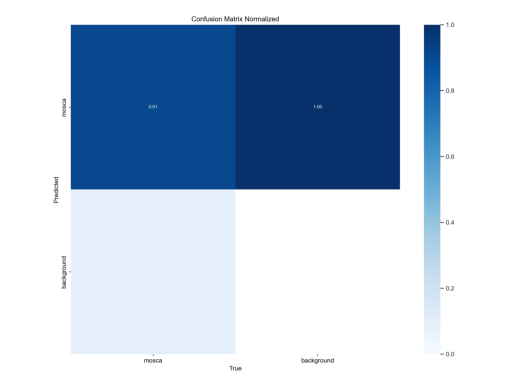

In [1]:
import cv2
import matplotlib.pyplot as plt

# Caminho para a imagem 
img_path = '/Users/rafael/Desktop/PestTracker2/train14/confusion_matrix_normalized.png'

# Abrir a imagem com OpenCV
img = cv2.imread(img_path)

# Conversão da imagem de BGR (OpenCV) para RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostrar a imagem
plt.imshow(img_rgb)
plt.axis('off')  
plt.show()


F1 

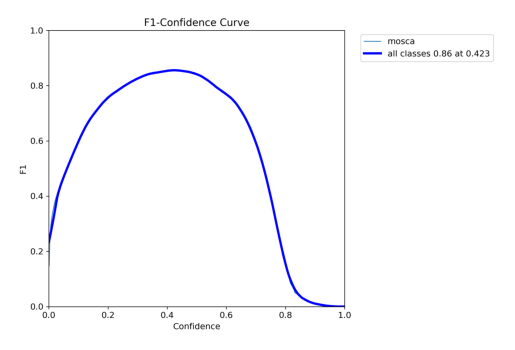

In [2]:
import cv2
import matplotlib.pyplot as plt

# Caminho  para a imagem 
img_path = '/Users/rafael/Desktop/PestTracker2/train14/F1_curve.png'

# Abrir a imagem PNG 
img = cv2.imread(img_path)

# Conversão da imagem de BGR (OpenCV) para RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# mostra a imagem
plt.imshow(img_rgb)
plt.axis('off')  # Remove os eixos
plt.show()

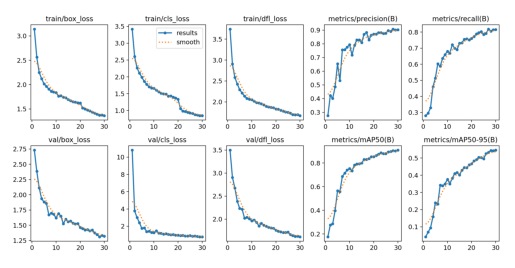

In [44]:
import cv2
import matplotlib.pyplot as plt

# Caminho para a imagem 
img_path = '/Users/rafael/Desktop/ceratitis/train14/results.png'

# Abre a imagem PNG 
img = cv2.imread(img_path)

# Converte a imagem de BGR (OpenCV) para RGB (matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Mostra a imagem 
plt.imshow(img_rgb)
plt.axis('off')  # Remove os eixos
plt.show()
